### Data Source

The Consumer Complaint Database [https://www.consumerfinance.gov/data-research/consumer-complaints/search/?from=0&searchField=all&searchText=&size=25&sort=created_date_desc  ] from Consumer Financial Protection Bureau.

I downloaded the data on May 16, 2019. 
"complaints-2019-05-16_13_17.csv" file contains complaints with narratives. 383,958 records.
"Consumer_Complaints.csv" file contains all complaints with those records with no narratives. 1,285,487 complaints.  

Discription of the columns of the data.
https://www.consumerfinance.gov/complaint/data-use/

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pandas_profiling as pp

In [3]:
complaints = pd.read_csv("data/complaints-2019-05-16_13_17.csv")

/anaconda3/envs/insight/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
complaints.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [9]:
complaints.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/23/19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,The Summer of XX/XX/2018 I was denied a mortga...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,None,None,Consent provided,Web,03/23/19,Closed with explanation,Yes,NaN,3189109
1,03/23/19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,"Transunion, XXXX, XXXX all show inquiries to b...",Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,325XX,None,Consent provided,Web,03/23/19,Closed with explanation,Yes,NaN,3189147
2,03/21/19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,XXXX XXXX was in full on XX/XX/2019 in the amo...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,TN,372XX,None,Consent provided,Web,03/21/19,Closed with non-monetary relief,Yes,NaN,3187073
3,03/19/19,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,XXXX and Transunion are reporting incorrectly...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",LA,701XX,None,Consent provided,Web,03/19/19,Closed with explanation,Yes,NaN,3184195
4,03/18/19,Debt collection,Medical debt,Written notification about debt,Didn't receive notice of right to dispute,i never received anything stating that i owed ...,Company believes it acted appropriately as aut...,First Federal Credit Control,PA,None,None,Consent provided,Web,03/18/19,Closed with explanation,Yes,NaN,3182609


### Look at the unique values for each column

In [25]:
col_num = complaints.shape[1]
for i in np.arange(col_num):
    print("Column {}: Values of \"{}\"".format(i, complaints.columns.values[i]))
    print("Number of unique values {}".format(len(complaints.iloc[:,i].unique())))
    #print(complaints.iloc[:,i].unique())

Column 0: Values of "Date received"
Number of unique values 1466
Column 1: Values of "Product"
Number of unique values 18
Column 2: Values of "Sub-product"
Number of unique values 76
Column 3: Values of "Issue"
Number of unique values 161
Column 4: Values of "Sub-issue"
Number of unique values 216
Column 5: Values of "Consumer complaint narrative"
Number of unique values 367292
Column 6: Values of "Company public response"
Number of unique values 11
Column 7: Values of "Company"
Number of unique values 4121
Column 8: Values of "State"
Number of unique values 64
Column 9: Values of "ZIP code"
Number of unique values 10024
Column 10: Values of "Tags"
Number of unique values 4
Column 11: Values of "Consumer consent provided?"
Number of unique values 1
Column 12: Values of "Submitted via"
Number of unique values 1
Column 13: Values of "Date sent to company"
Number of unique values 1472
Column 14: Values of "Company response to consumer"
Number of unique values 7
Column 15: Values of "Timel

### Remove Nan in "Consumer disputed?"
These data are not labeled yet. We can not use these data to train and validate

In [6]:
complaints = complaints.dropna(subset=["Consumer disputed?"])

In [15]:
print("Number of complaints with narrative is ", len(complaints))

Number of complaints with narrative is  164076


### Count each subject

### See the number of complaints if removing all nan fields

In [16]:
temp = complaints
print(len(temp))
print("Complaints number with all fields filled is {}.".format(len(temp.dropna())))

164076
Complaints number with all fields filled is 164076.


## Check columns not to be used in the data
Check columns to see whether they have effect on classification.

### Find whether there are multiple complaints submitted by same user

In [48]:
complaints.groupby("Complaint ID").count()["Issue"].max()

1

There is no complaints submitted by same user. We don't need this column. 
But the column is the only column containing no na value, which is useful for counting.

### Check whether we need Tags column

In [51]:
complaints.groupby("Tags").count()["Issue"]

Tags
Older American                   77094
Older American, Servicemember    14034
Servicemember                    84916
Name: Issue, dtype: int64

In [54]:
complaints["Tags"].isna().sum()

1109443

There is a lot of Nan in this field. I am not sure whether the "older American, and serciemember" tag could cause some discrimitive issue.  May be not use "Tags" column for now. 

### Check the number of dispute of top 20 companies

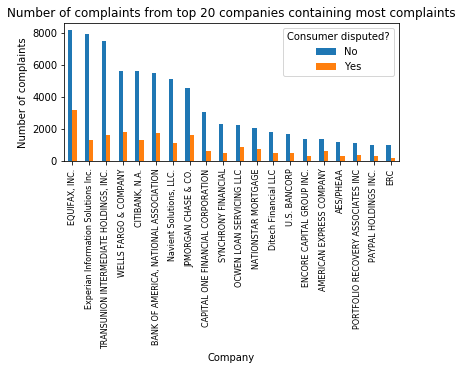

In [27]:
dispute_by_company = complaints.groupby(["Company", "Consumer disputed?"]).count()["Complaint ID"].unstack().sort_values(by=["No"], ascending=False)
dispute_by_top_company = dispute_by_company[0:20]
dispute_by_top_company.plot.bar()
plt.ylabel("Number of complaints")
plt.xticks(fontsize=8)
plt.title("Number of complaints from top 20 companies containing most complaints")
plt.gcf().subplots_adjust(bottom=0.4)
plt.savefig("figs/top20_company.png", bbox_inches='tight')

In [28]:
dispute_by_top_company

Consumer disputed?,No,Yes
Company,,
"EQUIFAX, INC.",8228.0,3228.0
Experian Information Solutions Inc.,7964.0,1343.0
"TRANSUNION INTERMEDIATE HOLDINGS, INC.",7497.0,1672.0
WELLS FARGO & COMPANY,5677.0,1826.0
"CITIBANK, N.A.",5670.0,1323.0
"BANK OF AMERICA, NATIONAL ASSOCIATION",5505.0,1749.0
"Navient Solutions, LLC.",5154.0,1139.0
JPMORGAN CHASE & CO.,4609.0,1652.0
CAPITAL ONE FINANCIAL CORPORATION,3085.0,678.0


It can be seen that "Experian Information Solutions Inc" has better strategy of dealing with complaints. Although it contains more complaints than the following two companies, it contains far less disputed ones.  Let's have a look of the dispute ratio within this top 20 companies.

/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


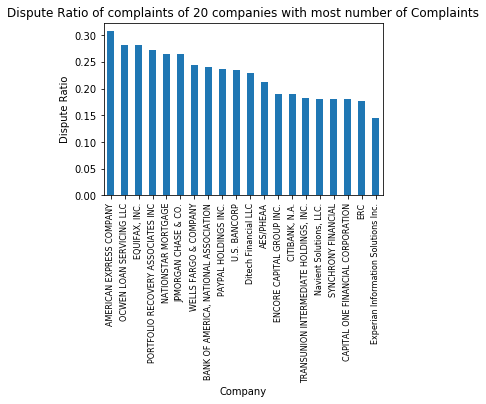

In [31]:
dispute_by_top_company["dispute_ratio"] = dispute_by_top_company["Yes"] / (dispute_by_top_company["Yes"] + dispute_by_top_company["No"])
dispute_ratio_by_top_company = dispute_by_top_company["dispute_ratio"].sort_values(ascending=False)
plt.figure(figsize=(5, 5))
dispute_ratio_by_top_company.plot.bar()
plt.xticks(fontsize=8)
plt.gcf().subplots_adjust(bottom=0.4)
plt.title("Dispute Ratio of complaints of 20 companies with most number of Complaints")
plt.ylabel("Dispute Ratio")
plt.savefig("figs/dispute_ratio_of_top20_company.png", bbox_inches='tight')


In [32]:
dispute_ratio_by_top_company

Company
AMERICAN EXPRESS COMPANY                  0.307882
OCWEN LOAN SERVICING LLC                  0.282278
EQUIFAX, INC.                             0.281774
PORTFOLIO RECOVERY ASSOCIATES INC         0.271165
NATIONSTAR MORTGAGE                       0.264151
JPMORGAN CHASE & CO.                      0.263856
WELLS FARGO & COMPANY                     0.243369
BANK OF AMERICA, NATIONAL ASSOCIATION     0.241108
PAYPAL HOLDINGS INC.                      0.235693
U.S. BANCORP                              0.235162
Ditech Financial LLC                      0.229358
AES/PHEAA                                 0.213006
ENCORE CAPITAL GROUP INC.                 0.189329
CITIBANK, N.A.                            0.189189
TRANSUNION INTERMEDIATE HOLDINGS, INC.    0.182354
Navient Solutions, LLC.                   0.180995
SYNCHRONY FINANCIAL                       0.180362
CAPITAL ONE FINANCIAL CORPORATION         0.180175
ERC                                       0.175797
Experian Information So

It can tell that **Experian Information Solutions Inc.** does have the smallest dispute rate although its complaint number is top 3.  It's strategy of dealing with complaints deserve research.

### Examine complaints especially to "Experian Information Solutions Inc" company
In the previous two graph, the "Experian Information Solutions Inc" company contains the lowest dispute ratio while top 3 complaints number.  Let's extract its data.

In [33]:
experian_complaints = complaints[complaints["Company"] == "Experian Information Solutions Inc."]
len(experian_complaints)

9307

### Check whether "Company public response" related to whether dispute or not

Text(0.5, 1.0, 'The bar chart of complaints number with different Company public response.')

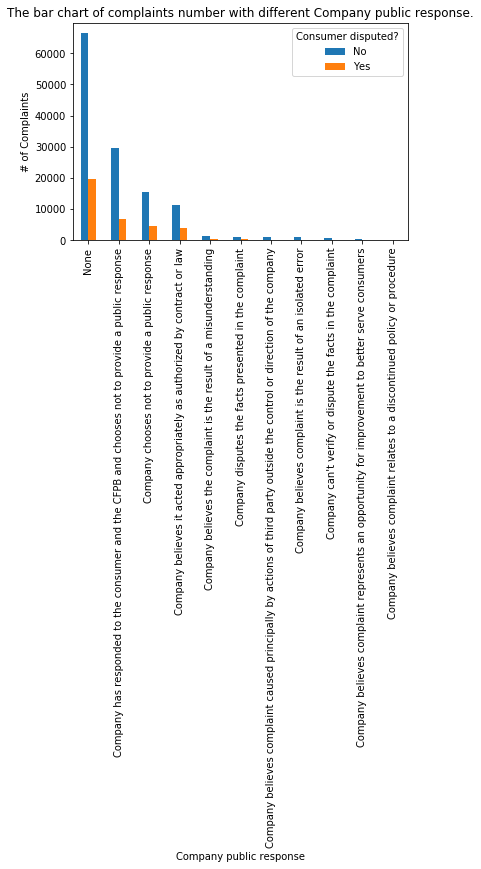

In [35]:
public_response_to_dispute = complaints.groupby(["Company public response", "Consumer disputed?"]).count()["Complaint ID"].unstack()
public_response_to_dispute = public_response_to_dispute.sort_values(by=["No"], ascending=False)
public_response_to_dispute.plot.bar()
plt.ylabel("# of Complaints")
plt.title("The bar chart of complaints number with different Company public response.")

### Do the same to Experin company

Text(0.5, 1.0, 'The bar chart of complaints number with different Company public response by Experian.')

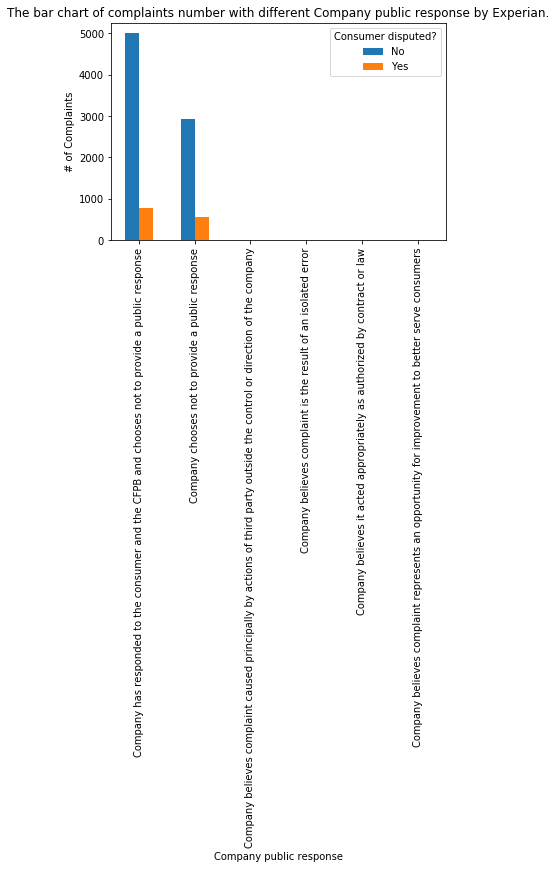

In [36]:
experian_complaints.groupby(["Company public response", "Consumer disputed?"]).count()

experian_public_response_to_dispute = experian_complaints.groupby(["Company public response", "Consumer disputed?"]).count()["Complaint ID"].unstack()
experian_public_response_to_dispute = experian_public_response_to_dispute.sort_values(by=["No"], ascending=False)
experian_public_response_to_dispute.plot.bar()
plt.ylabel("# of Complaints")
plt.title("The bar chart of complaints number with different Company public response by Experian.")

### Check how the "Company response to consumer" is related to "related to whether dispute or not".

Text(0.5, 1.0, 'The bar chart of complaints number with different Company response to consumer.')

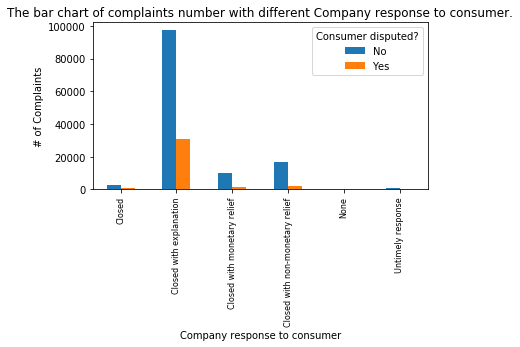

In [37]:
response_to_disputed = complaints.groupby(["Company response to consumer", "Consumer disputed?"]).count()["Complaint ID"].unstack()
#repsonse_to_disputed = response_to_disputed.sort_values(by=["No"], ascending=False)
response_to_disputed.plot.bar()
plt.ylabel("# of Complaints")
plt.xticks(fontsize=8)
plt.gcf().subplots_adjust(bottom=0.3)
plt.title("The bar chart of complaints number with different Company response to consumer.")

### Check the strategy of Experian Information Inc.

Text(0.5, 1.0, 'The bar chart of complaints number with different Company response to consumer by Experian Information Inc.')

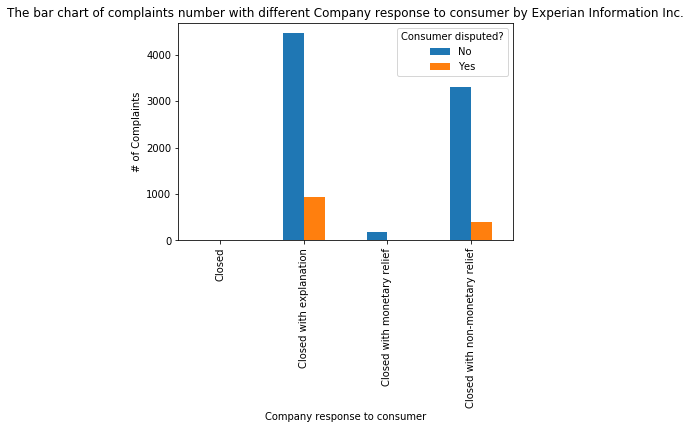

In [38]:
response_to_disputed = experian_complaints.groupby(["Company response to consumer", "Consumer disputed?"]).count()["Complaint ID"].unstack()
#repsonse_to_disputed = response_to_disputed.sort_values(by=["No"], ascending=False)
response_to_disputed.plot.bar()
plt.ylabel("# of Complaints")
plt.title("The bar chart of complaints number with different Company response to consumer by Experian Information Inc.")

### Check the dispute distribution of each Product

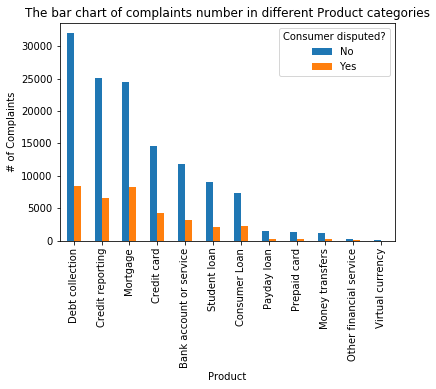

In [43]:
dispute_by_product = complaints.groupby(["Product", "Consumer disputed?"]).count()["Complaint ID"].unstack()
dispute_by_product = dispute_by_product.sort_values(by=["No"], ascending=False)
dispute_by_product.plot.bar()
plt.ylabel("# of Complaints")
plt.title("The bar chart of complaints number in different Product categories")
plt.savefig("figs/complaints_each_Product_category.png", bbox_inches='tight')


### Check the dispute distribution of each Issue type

In [40]:
print("number of different issues: " + str(len(complaints["Issue"].unique())))
#complaints["Issue"].value_counts()
      

number of different issues: 91


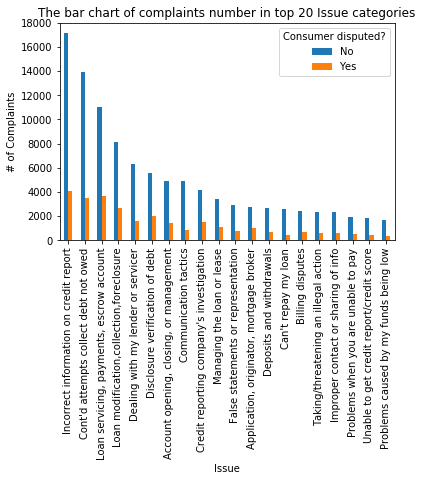

In [41]:
dispute_by_issue = complaints.groupby(["Issue", "Consumer disputed?"]).count()["Complaint ID"].unstack()
dispute_by_issue = dispute_by_issue.sort_values(by=["No"], ascending=False)
dispute_by_issue[:20].plot.bar()
plt.ylabel("# of Complaints")
plt.title("The bar chart of complaints number in top 20 Issue categories")
#plt.savefig("figs/complaints_of_top20_Issues.png")

### Conclusion
Company response is important to decide whether a complaint will escalate or not. 